### Convolutional Neural Network Cifar dataset

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import keras

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.cifar10.load_data()
X_train.shape ,X_test.shape ,y_train.shape ,y_test.shape 

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [4]:
y_train.reshape(-1,)

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

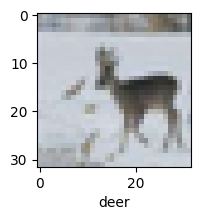

In [6]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
def ShowImage(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

ShowImage(X_train,y_train,20)

In [7]:
X_train[0][0][0:5]  # So we should scale the data

array([[59, 62, 63],
       [43, 46, 45],
       [50, 48, 43],
       [68, 54, 42],
       [98, 73, 52]], dtype=uint8)

In [8]:
X_train = X_train/255
X_test = X_test/255

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=10)

2024-01-05 16:46:37.600281: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10


2024-01-05 16:46:40.031200: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f510476d0e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-05 16:46:40.031280: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 Ti, Compute Capability 7.5
I0000 00:00:1704453400.402335    3332 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 [==============================] - 20s 12ms/step - loss: 1.8124 - accuracy: 0.3521
Epoch 2/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.6246 - accuracy: 0.4274
Epoch 3/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.5412 - accuracy: 0.4534
Epoch 4/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.4820 - accuracy: 0.4782
Epoch 5/10
1563/1563 [==============================] - 18s 11ms/step - loss: 1.4336 - accuracy: 0.4935
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3908 - accuracy: 0.5102
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.3525 - accuracy: 0.5255
Epoch 8/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.3198 - accuracy: 0.5355
Epoch 9/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.2839 - accuracy: 0.5505
Epoch 10/10
1563/1563 [==============================] - 23s 14ms/step - lo

In [15]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.5226 - accuracy: 0.4564


[1.5225658416748047, 0.4564000070095062]

Not bad but with convolutional NN it can be done better

In [15]:
cnn = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
cnn.fit(X_train,y_train,epochs=10)

2024-01-05 17:18:13.318400: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
1563/1563 [==============================] - 23s 11ms/step - loss: 1.5362 - accuracy: 0.4410
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1579 - accuracy: 0.5916
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0082 - accuracy: 0.6468
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9212 - accuracy: 0.6778
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8533 - accuracy: 0.7032
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8010 - accuracy: 0.7213
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7604 - accuracy: 0.7346
Epoch 8/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7165 - accuracy: 0.7512
Epoch 9/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6842 - accuracy: 0.7627
Epoch 10/10
1563/1563 [==============================] - 16s 10m

In [17]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.9281 - accuracy: 0.6982


[0.9280781149864197, 0.698199987411499]

In [18]:
y_pred = cnn.predict(X_test)
y_pred

313/313 [==============================] - 1s 4ms/step


array([[1.81539003e-02, 4.39062802e-04, 3.90277291e-03, ...,
        2.65702547e-04, 2.29114238e-02, 1.53270114e-04],
       [1.33976701e-03, 1.46983132e-01, 1.25868883e-06, ...,
        8.70469419e-10, 8.51162493e-01, 5.12659608e-04],
       [1.51394218e-01, 3.04444402e-01, 4.01701592e-03, ...,
        5.80976892e-04, 4.55379516e-01, 7.68012777e-02],
       ...,
       [8.71821430e-06, 6.84206452e-06, 1.18008852e-02, ...,
        2.03797407e-03, 5.93941149e-06, 7.36353195e-06],
       [5.16446829e-01, 3.69146556e-01, 2.72069201e-02, ...,
        3.31788542e-05, 2.16492312e-03, 2.80947970e-05],
       [6.28307544e-06, 8.75944988e-06, 2.23988853e-03, ...,
        9.88523662e-01, 9.99562758e-07, 1.10758965e-05]], dtype=float32)

In [20]:
y_pred = np.array([ np.argmax(y) for y in y_pred ])
y_pred

array([3, 8, 8, ..., 5, 0, 7])

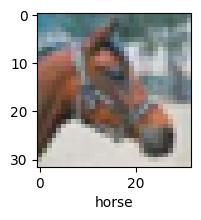

In [33]:
ShowImage(X_test,y_test,17)

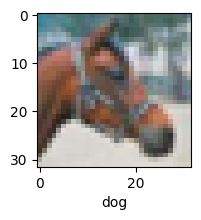

In [34]:
ShowImage(X_test,y_pred,17)

In [32]:
y_test[0:20] , y_pred[0:20]

(array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6],
       dtype=uint8),
 array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 5, 8, 6]))